In [1]:
import random
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
import scipy.stats as stats
from lib.utils import *
import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.colors as colors
%matplotlib inline

import plotly.offline as py

py.init_notebook_mode(connected=True)


In [2]:
train = pd.read_csv('dataset.csv')
print("Train set size:", train.shape)
ac=[]

Train set size: (5268, 13)


In [3]:
train.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [5]:
train.dtypes.value_counts()

object     10
float64     3
dtype: int64

In [6]:
train.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [7]:

train.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [8]:
train_first = train.copy()
train['Time'] = train['Time'].replace(np.nan, '00:00') 
train['Time'] = train['Time'].str.replace('c: ', '')
train['Time'] = train ['Time'].str.replace('c:', '')
train['Time'] = train ['Time'].str.replace('c', '')
train['Time'] = train ['Time'].str.replace('12\'20', '12:20')
train['Time'] = train ['Time'].str.replace('18.40', '18:40')
train['Time'] = train ['Time'].str.replace('0943', '09:43')
train['Time'] = train ['Time'].str.replace('22\'08', '22:08')
train['Time'] = train ['Time'].str.replace('114:20', '00:00')

train.Operator = train.Operator.str.upper() 

operator = train[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])

In [9]:

time = pd.to_datetime(train['Time'], format='%H:%M')
train['hour'] = time.dt.hour
train['Year'] = train['Date'].apply(lambda x: int(str(x)[-4:]))


In [10]:
train['Survived'] = train['Aboard'] - train['Fatalities'] - train['Ground']
train['Has_Survivors'] = 1
train.loc[train['Survived'] == 0, 'Has_Survivors'] = 0

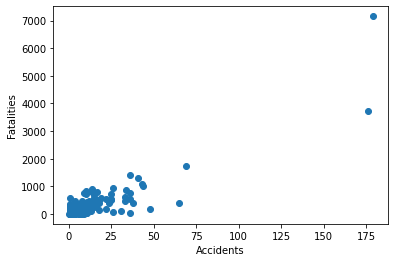

In [11]:
train['Fatalities'] = train['Fatalities'].fillna(0)
X = operator['Fatalities','count']
Y = operator['Fatalities','sum']
plt.scatter(X, Y,label='Operators')
plt.ylabel('Fatalities')
plt.xlabel('Accidents');

In [12]:
train_first['Fatalities_percentage'] = train['Fatalities'] / train['Aboard']
print(train_first['Fatalities_percentage'].head(5))

0    0.5
1    1.0
2    1.0
3    0.7
4    1.0
Name: Fatalities_percentage, dtype: float64


In [13]:
print("Skewness: %f" % train['Fatalities'].skew())
print("Kurtosis: %f" % train['Fatalities'].kurt())

Skewness: 4.952818
Kurtosis: 42.889113


C:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:title={'center':'Log Normal'}, xlabel='Fatalities'>

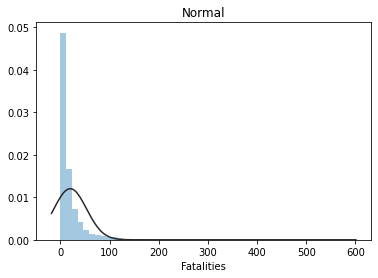

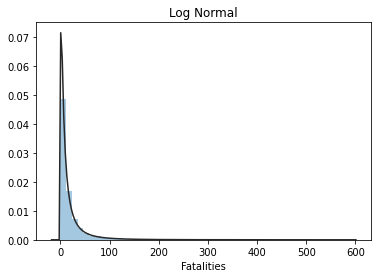

In [14]:
y = train['Fatalities']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [15]:
train["log_Fatalities"] = np.log1p(train["Fatalities"])

In [16]:
print("Skewness: %f" % train['log_Fatalities'].skew())
print("Kurtosis: %f" % train['log_Fatalities'].kurt())

Skewness: 0.339361
Kurtosis: -0.467497


In [17]:
train.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,hour,Year,Survived,Has_Survivors,log_Fatalities
0,09/17/1908,17:18,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",17,1908,1.0,1,0.693147
1,07/12/1912,06:30,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,6,1912,0.0,0,1.791759
2,08/06/1913,00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0,1913,0.0,0,0.693147


C:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: Matpl

<AxesSubplot:xlabel='Operator'>

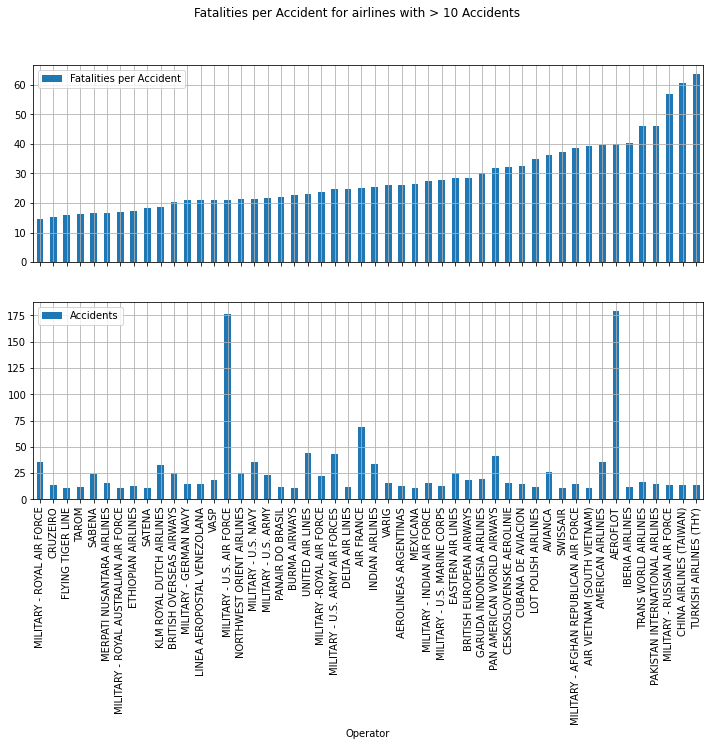

In [18]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

props = operator['Fatalities'].reset_index()
props['Fatalities per Accident'] = props['sum']/props['count']
props.columns = ['Operator','Fatalities','Accidents','Fatalities per Accident']

fig_p,(axp1,axp2) = plt.subplots(2,1,sharex = True)
minacc = 10
fig_p.suptitle('Fatalities per Accident for airlines with > %s Accidents' % minacc)
propstoplot = props[props['Accidents']>minacc]
propstoplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator'
                                                               , y = 'Fatalities per Accident'
                                                               , ax = axp1
                                                               , kind = 'bar'
                                                               , grid = True)
propstoplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator'
                                                               , y = 'Accidents'
                                                               , ax = axp2
                                                               , kind = 'bar'
                                                               , grid = True)

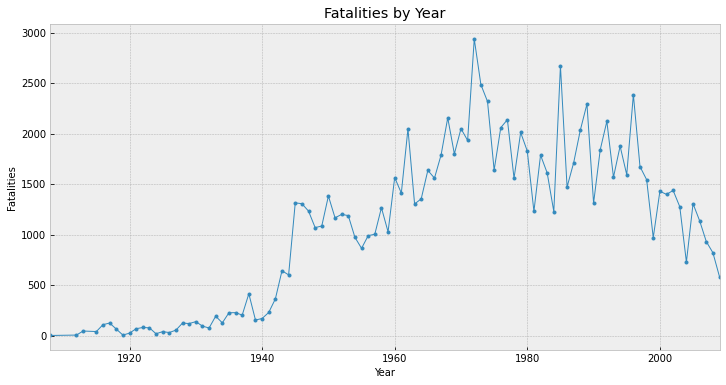

In [19]:
yearly = train[['Year','Fatalities']].groupby('Year').agg(['sum','count'])
plt.style.use('bmh')
plt.figure(figsize=(12,6))
yearly['Fatalities','sum'].plot(title='Fatalities by Year',marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Fatalities', fontsize=10)
plt.show()


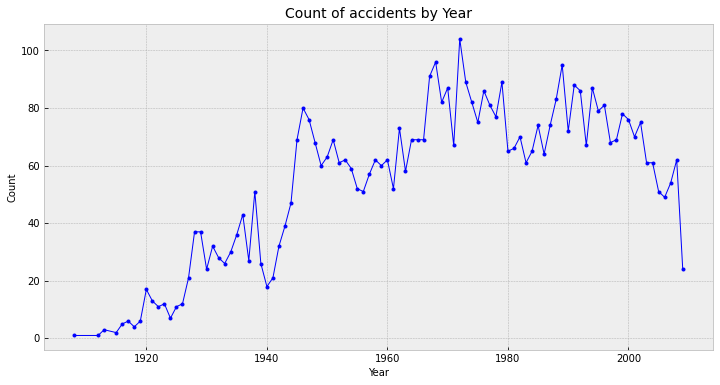

In [20]:
from datetime import date, timedelta, datetime
train_first['Time1'] = train['Date'] + ' ' + train['Time'] #joining two rows
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
train_first['Time1'] = train_first['Time1'].apply(todate) #convert to date type

Temp = train_first.groupby(train_first.Time1.dt.year)[['Date']].count() #Temp is going to be temporary data frame 
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()


C:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

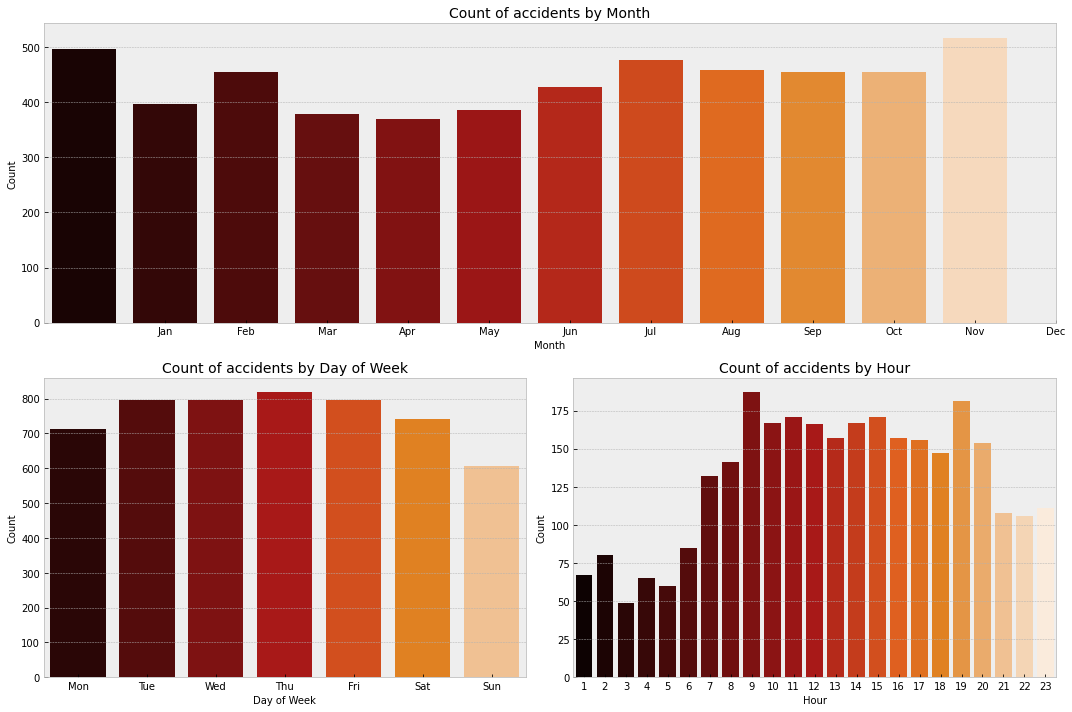

In [21]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
ax = pl.subplot(gs[0, :]) # row 0, col 0
sns.barplot(train_first.groupby(train_first.Time1.dt.month)[['Date']].count().index, 'Date', data= train_first.groupby(train_first.Time1.dt.month)[['Date']].count(), palette="gist_heat", linewidth=2)
plt.xticks(train_first.groupby(train_first.Time1.dt.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 0])
sns.barplot(train_first.groupby(train_first.Time1.dt.weekday)[['Date']].count().index, 'Date', data=train_first.groupby(train_first.Time1.dt.weekday)[['Date']].count(), palette="gist_heat", linewidth=2)
plt.xticks(train_first.groupby(train_first.Time1.dt.weekday)[['Date']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 1])
sns.barplot(train_first[train_first.Time1.dt.hour != 0].groupby(train_first.Time1.dt.hour)[['Date']].count().index, 'Date', data=train_first[train_first.Time1.dt.hour != 0].groupby(train_first.Time1.dt.hour)[['Date']].count(),palette="gist_heat", linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: Matpl

<AxesSubplot:xlabel='Cleaned Country'>

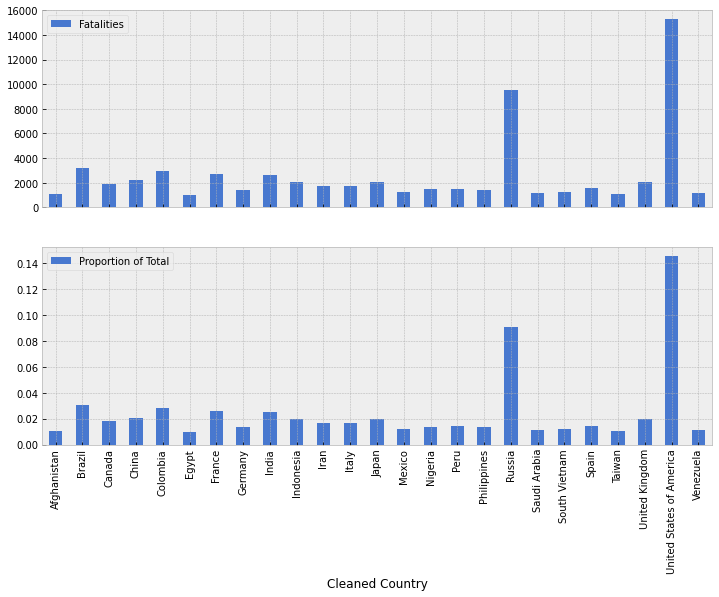

In [22]:
#Splitting out the country from the location to see if we can find some interesting statistics about where the most crashes have taken place.
fatalities = operator['Fatalities','sum'].sort_values(ascending=False)
totalfatal = fatalities.sum()
fatalprop = fatalities/totalfatal

s = train_first['Location'].str[0:].str.split(',', expand=True)
train_first['Country'] = s[3].fillna(s[2]).fillna(s[1]).str.strip()
#I've pulled out all the US states so as to be able to assign them a country

usNames = ['Virginia','New Jersey','Ohio','Pennsylvania', 'Maryland', 'Indiana', 'Iowa',
          'Illinois','Wyoming', 'Minnisota', 'Wisconsin', 'Nevada', 'NY','California',
          'WY','New York','Oregon', 'Idaho', 'Connecticut','Nebraska', 'Minnesota', 'Kansas',
          'Texas', 'Tennessee', 'West Virginia', 'New Mexico', 'Washington', 'Massachusetts',
          'Utah', 'Ilinois','Florida', 'Michigan', 'Arkansas','Colorado', 'Georgia''Missouri',
          'Montana', 'Mississippi','Alaska','Jersey', 'Cailifornia', 'Oklahoma','North Carolina',
          'Kentucky','Delaware','D.C.','Arazona','Arizona','South Dekota','New Hampshire','Hawaii',
          'Washingon','Massachusett','Washington DC','Tennesee','Deleware','Louisiana',
          'Massachutes', 'Louisana', 'New York (Idlewild)','Oklohoma','North Dakota','Rhode Island',
          'Maine','Alakska','Wisconson','Calilfornia','Virginia','Virginia.','CA','Vermont',
          'HI','AK','IN','GA','Coloado','Airzona','Alabama','Alaksa' 
          ]


afNames = ['Afghanstan'] 
anNames = ['off Angola'] 
ausNames = ['Qld. Australia','Queensland  Australia','Tasmania','off Australia'] 
argNames = ['Aregntina']
azNames = ['Azores (Portugal)'] 
baNames = ['Baangladesh'] 
bahNames = ['Great Inagua'] 
berNames = ['off Bermuda'] 
bolNames = ['Boliva','BO'] 
bhNames = ['Bosnia-Herzegovina'] 
bulNames = ['Bugaria','Bulgeria'] 
canNames = ['British Columbia', 'British Columbia Canada','Canada2',
            'Saskatchewan','Yukon Territory'] 
camNames = ['Cameroons','French Cameroons'] 
caNames = ['Cape Verde Islands'] 
chNames = ['Chili'] 
coNames = ['Comoro Islands', 'Comoros Islands'] 
djNames = ['Djbouti','Republiof Djibouti']
domNames = ['Domincan Republic', 'Dominica'] 
drcNames = ['Belgian Congo','Belgian Congo (Zaire)','Belgium Congo'
           'DR Congo','DemocratiRepubliCogo','DemocratiRepubliCongo',
            'DemocratiRepubliof Congo','DemoctratiRepubliCongo','Zaire',
           'Zaïre'] 
faNames = ['French Equitorial Africa'] 
gerNames = ['East Germany','West Germany'] 
grNames = ['Crete'] #Greece
haNames = ['Hati'] #Haiti
hunNames = ['Hunary'] #Hungary
inNames = ['Indian'] #India
indNames = ['Inodnesia','Netherlands Indies'] #Indonesia
jamNames = ['Jamacia'] #Jamaica
malNames = ['Malaya'] #Malaysia
manNames = ['Manmar'] #Myanmar
marNames = ['Mauretania'] #Mauritania
morNames = ['Morrocco','Morroco'] #Morocco
nedNames = ['Amsterdam','The Netherlands'] #Netherlands
niNames = ['Niger'] #Nigeria
philNames = ['Philipines','Philippine Sea', 'Phillipines',
            'off the Philippine island of Elalat'] #Philippines
romNames = ['Romainia'] #Romania
rusNames = ['Russian','Soviet Union','USSR'] #Russia
saNames = ['Saint Lucia Island'] #Saint Lucia
samNames = ['Western Samoa'] #Samoa
siNames = ['Sierre Leone'] #Sierra Leone
soNames = ['South Africa (Namibia)'] #South Africa
surNames = ['Suriname'] #Surinam
uaeNames = ['United Arab Emirates'] #UAE
ukNames = ['England', 'UK','Wales','110 miles West of Ireland'] #United Kingdom
uvNames = ['US Virgin Islands','Virgin Islands'] #U.S. Virgin Islands
wkNames = ['325 miles east of Wake Island']#Wake Island
yuNames = ['Yugosalvia'] #Yugoslavia
zimNames = ['Rhodesia', 'Rhodesia (Zimbabwe)'] #Zimbabwe

clnames = []
for country in train_first['Country'].values:
    if country in afNames:
        clnames.append('Afghanistan')
    elif country in anNames:
        clnames.append('Angola')
    elif country in ausNames:
        clnames.append('Australia')
    elif country in argNames:
        clnames.append('Argentina')
    elif country in azNames:
        clnames.append('Azores')
    elif country in baNames:
        clnames.append('Bangladesh')
    elif country in bahNames:
        clnames.append('Bahamas')
    elif country in berNames:
        clnames.append('Bermuda')
    elif country in bolNames:
        clnames.append('Bolivia')
    elif country in bhNames:
        clnames.append('Bosnia Herzegovina')
    elif country in bulNames:
        clnames.append('Bulgaria')
    elif country in canNames:
        clnames.append('Canada')
    elif country in camNames:
        clnames.append('Cameroon')
    elif country in caNames:
        clnames.append('Cape Verde')
    elif country in chNames:
        clnames.append('Chile')
    elif country in coNames:
        clnames.append('Comoros')
    elif country in djNames:
        clnames.append('Djibouti')
    elif country in domNames:
        clnames.append('Dominican Republic')
    elif country in drcNames:
        clnames.append('Democratic Republic of Congo')
    elif country in faNames:
        clnames.append('French Equatorial Africa')
    elif country in gerNames:
        clnames.append('Germany')
    elif country in grNames:
        clnames.append('Greece')
    elif country in haNames:
        clnames.append('Haiti')
    elif country in hunNames:
        clnames.append('Hungary')
    elif country in inNames:
        clnames.append('India')
    elif country in jamNames:
        clnames.append('Jamaica')
    elif country in malNames:
        clnames.append('Malaysia')
    elif country in manNames:
        clnames.append('Myanmar')
    elif country in marNames:
        clnames.append('Mauritania')
    elif country in morNames:
        clnames.append('Morocco')
    elif country in nedNames:
        clnames.append('Netherlands')
    elif country in niNames:
        clnames.append('Nigeria')
    elif country in philNames:
        clnames.append('Philippines')
    elif country in romNames:
        clnames.append('Romania')
    elif country in rusNames:
        clnames.append('Russia')
    elif country in saNames:
        clnames.append('Saint Lucia')
    elif country in samNames:
        clnames.append('Samoa')
    elif country in siNames:
        clnames.append('Sierra Leone')
    elif country in soNames:
        clnames.append('South Africa')
    elif country in surNames:
        clnames.append('Surinam')
    elif country in uaeNames:
        clnames.append('UAE')
    elif country in ukNames:
        clnames.append('United Kingdom')
    elif country in usNames:
        clnames.append('United States of America')
    elif country in uvNames:
        clnames.append('U.S. Virgin Islands')
    elif country in wkNames:
        clnames.append('Wake Island')
    elif country in yuNames:
        clnames.append('Yugoslavia')
    elif country in zimNames:
        clnames.append('Zimbabwe')
    else:
        clnames.append(country)
        
train_first['Cleaned Country'] = clnames        
fatalcountries = train_first[['Fatalities','Cleaned Country']].groupby(['Cleaned Country']).agg('sum')
fatalcountries.reset_index(inplace = True)
fatalcountries['Proportion of Total'] = fatalcountries['Fatalities']/totalfatal

fig_c, (ax1,ax2) = plt.subplots(2,1,sharex = True)
fatalcountries[fatalcountries['Fatalities']>1000].plot(x = 'Cleaned Country'
                                                     , y = 'Fatalities'
                                                     , ax = ax1
                                                     , kind = 'bar'
                                                     , grid = True)
fatalcountries[fatalcountries['Fatalities']>1000].plot(x = 'Cleaned Country'
                                                     , y = 'Proportion of Total'
                                                     , ax = ax2
                                                     , kind = 'bar'
                                                     , grid = True)

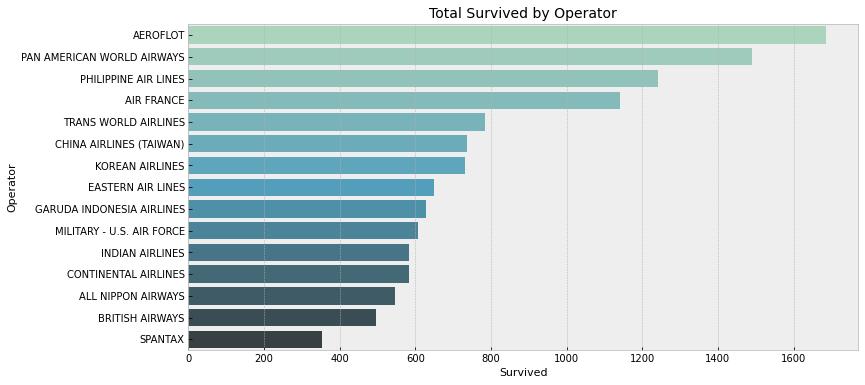

In [23]:
train1 = train.groupby('Operator')[['Survived']].sum()
train1 = train1.rename(columns={"Operator": "Survived"})
train1 = train1.sort_values(by='Survived', ascending=False)
Prop_by_OpTOP = train1.head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=Prop_by_OpTOP.index, x="Survived", data=Prop_by_OpTOP, palette="GnBu_d", orient='h')
plt.xlabel('Survived', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Survived by Operator', loc='Center', fontsize=14)
plt.show()

In [24]:
fatalcountries.sort_values(by='Proportion of Total', ascending=False).head(10)

,Cleaned Country,Fatalities,Proportion of Total
228,United States of America,15288.0,0.145153
181,Russia,9538.0,0.090560
30,Brazil,3205.0,0.030430
46,Colombia,2935.0,0.027867
72,France,2735.0,0.025968
98,India,2628.0,0.024952
45,China,2189.0,0.020784
227,United Kingdom,2071.0,0.019663
100,Indonesia,2050.0,0.019464
109,Japan,2050.0,0.019464


In [25]:
route= train.groupby('Route').agg({'Fatalities':['sum',lambda x:x.sum() / train['Fatalities'].sum()]})
route.columns=route.columns.map(''.join)
route.reset_index(inplace=True)
route.rename(columns={'Fatalitiessum':'Total Fatalities','Fatalities<lambda_0>':'% of Total Fatalities'}, inplace=True)

route.sort_values(by='Total Fatalities', ascending=False).head(7)

,Route,Total Fatalities,% of Total Fatalities
2968,Tenerife - Las Palmas / Tenerife - Las Palmas,583.0,0.005527
3012,Tokyo - Osaka,557.0,0.005281
3029,Training,457.0,0.004333
2276,Paris - London,375.0,0.003555
2057,New Delhi - Dhahran / Chimkent - New Delhi,349.0,0.003309
1957,Montreal - London,329.0,0.003119
2522,Riyadh - Jeddah,301.0,0.002854


In [26]:
from collections import Counter
loc_list = Counter(train['Location'].dropna()).most_common(10)
locs = []
crashes = []
for loc in loc_list:
    locs.append(loc[0])
    crashes.append(loc[1])
pd.DataFrame({'Crashes in this location' : crashes}, index=locs)

,Crashes in this location
"Sao Paulo, Brazil",15
"Moscow, Russia",15
"Rio de Janeiro, Brazil",14
"Bogota, Colombia",13
"Manila, Philippines",13
"Anchorage, Alaska",13
"New York, New York",12
"Cairo, Egypt",12
"Chicago, Illinois",11
"Near Moscow, Russia",9


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [28]:
text_data = train['Summary'].dropna()
text_data = pd.DataFrame(text_data)

In [29]:
documents = list(text_data['Summary'])
vectorizer = TfidfVectorizer(stop_words='english') # Stop words are like "a", "the", or "in" which don't have significant meaning
X = vectorizer.fit_transform(documents)

In [30]:

random_state = 0 
model = MiniBatchKMeans(n_clusters=7, random_state=random_state)
model.fit(X)

MiniBatchKMeans(n_clusters=7, random_state=0)

In [31]:
print ('Most Common Terms per Cluster:')

order_centroids = model.cluster_centers_.argsort()[:,::-1] #sort cluster centers by proximity to centroid
terms = vectorizer.get_feature_names()

for i in range(7):
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :10]: #replace 10 with n words per cluster
        print ('%s' % terms[j]),
    print

Most Common Terms per Cluster:


Cluster 0:
mountain
cargo
plane
crashed
struck
poor
flew
attempting
weather
land


Cluster 1:
attempting
land
landing
crashed
shot
aircraft
air
struck
plane
midair


Cluster 2:
en
route
crashed
disappeared
mountain
plane
cargo
weather
aircraft
flight


Cluster 3:
crashed
aircraft
flight
taking
pilot
plane
weather
shortly
conditions
sea


Cluster 4:
engine
takeoff
failure
crashed
plane
aircraft
shortly
failed
lost
power


Cluster 5:
cause
undetermined
unknown
crashed
probable
sea
miles
taking
disappeared
aircraft


Cluster 6:
approach
runway
short
crashed
aircraft
crew
pilot
landing
ground
plane


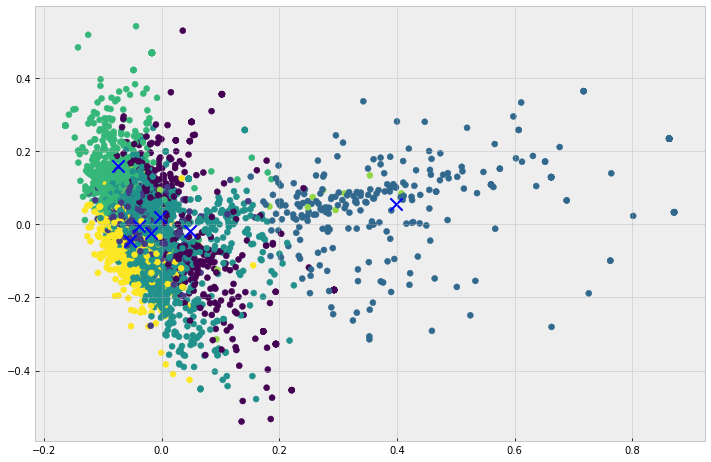

In [32]:

pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(X.toarray())
reduced_cluster_centers = pca.transform(model.cluster_centers_)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:1000], y[:1000], test_size=0.33, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ac.append(accuracy_score(y_pred,y_test,sample_weight=0.2)*100)

In [35]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ac.append(accuracy_score(y_pred,y_test,sample_weight=0.8)*100)

In [36]:
print("Prediction")

Y = vectorizer.transform(["engine failure"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["terrorism"])
prediction = model.predict(Y)
print(prediction)

Prediction
[1.]
[1.]


the accuracy of Logistics Regression is 95.27 and Adaboost is 90.44


C:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(50.0, 100.0)

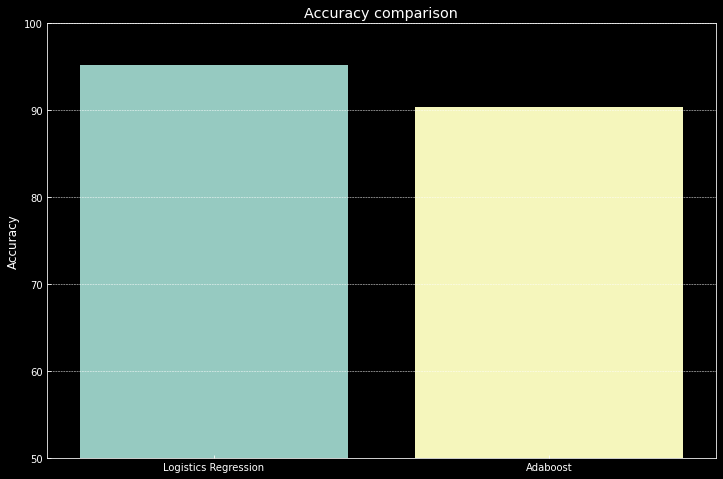

In [37]:

import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('dark_background')
x=['Logistics Regression','Adaboost']
 
ax=sns.barplot(x,ac[:2])
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)